In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

`Exploring Data` 

In [2]:
df=pd.read_csv("evdata.csv")

In [3]:
df.head()

,Vehicle type,Model,Battery technology,Charging type,Battery capacity (kWh)
0,2W,Electric Photon HX,Li-Ion,AC slow\ncharging,1.872
1,2W,Nyx HX (Dual\nBattery),Li-Ion,AC slow\ncharging,3.072
2,2W,NYX LX,Li-Ion,AC slow\ncharging,1.536
3,2W,OPTIMA LX\n(VRLA),VRLA,AC slow\ncharging,0.96
4,2W,Optima LX,Li-Ion,AC slow\ncharging,1.536


In [4]:
#Checking NA vlaues
df.isna().sum()

Vehicle type              0
Model                     0
Battery technology        1
Charging type             5
Battery capacity (kWh)    7
dtype: int64

In [5]:
df.replace('-', pd.NA, inplace=True)
df=df.dropna()

In [6]:
df.isna().sum()

Vehicle type              0
Model                     0
Battery technology        0
Charging type             0
Battery capacity (kWh)    0
dtype: int64

In [7]:
df.shape

(101, 5)

In [8]:
# Converiting categorical data to numerical
label_encoder_vehicle = LabelEncoder()
label_encoder_battery = LabelEncoder()
label_encoder_charging = LabelEncoder()

In [9]:
df['Vehicle type'] = label_encoder_vehicle.fit_transform(df['Vehicle type'])
df['Battery technology'] = label_encoder_battery.fit_transform(df['Battery technology'])
df['Charging type'] = label_encoder_charging.fit_transform(df['Charging type'])

In [10]:
# Priniting Lables
print("Vehicle Type Labels:", label_encoder_vehicle.classes_)
print("Battery Technology Labels:", label_encoder_battery.classes_)
print("Charging Type Labels:", label_encoder_charging.classes_)

Vehicle Type Labels: ['2W' '3W' '4W']
Battery Technology Labels: ['Li-Ion' 'Li-NMC' 'VRLA']
Charging Type Labels: ['AC slow' 'AC slow\ncharging' 'AC slow and\nHypercharger\n(fast)'
 'AC slow and DC fast charging' 'AC slow charging' 'AC/DC charging'
 'Battery Swap']


In [11]:
# Creating a dictionary for label-class mappings
label_class_mapping_vehicle = dict(zip(label_encoder_vehicle.classes_, label_encoder_vehicle.transform(label_encoder_vehicle.classes_)))
label_class_mapping_battery = dict(zip(label_encoder_battery.classes_, label_encoder_battery.transform(label_encoder_battery.classes_)))
label_class_mapping_charging = dict(zip(label_encoder_charging.classes_, label_encoder_charging.transform(label_encoder_charging.classes_)))

In [12]:
# Printing label-class mappings
print(label_class_mapping_vehicle)
print(label_class_mapping_battery)
print(label_class_mapping_charging)

{'2W': 0, '3W': 1, '4W': 2}
{'Li-Ion': 0, 'Li-NMC': 1, 'VRLA': 2}
{'AC slow': 0, 'AC slow\ncharging': 1, 'AC slow and\nHypercharger\n(fast)': 2, 'AC slow and DC fast charging': 3, 'AC slow charging': 4, 'AC/DC charging': 5, 'Battery Swap': 6}


In [13]:
df.head()

,Vehicle type,Model,Battery technology,Charging type,Battery capacity (kWh)
0,0,Electric Photon HX,0,1,1.872
1,0,Nyx HX (Dual\nBattery),0,1,3.072
2,0,NYX LX,0,1,1.536
3,0,OPTIMA LX\n(VRLA),2,1,0.96
4,0,Optima LX,0,1,1.536


`Principal Component Analysis`

In [14]:
# Extracting features for pca
X=df[['Vehicle type','Battery technology','Charging type','Battery capacity (kWh)']]

In [15]:
# Standardizing the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [16]:
X_scaled

array([[-0.92238026, -0.78219274, -0.52530028, -0.38671826],
       [-0.92238026, -0.78219274, -0.52530028, -0.3222505 ],
       [-0.92238026, -0.78219274, -0.52530028, -0.40476924],
       [-0.92238026,  1.38223101, -0.52530028, -0.43571376],
       [-0.92238026, -0.78219274, -0.52530028, -0.40476924],
       [-0.92238026, -0.78219274, -0.52530028, -0.3222505 ],
       [-0.92238026, -0.78219274, -0.52530028, -0.40476924],
       [-0.92238026,  1.38223101, -0.52530028, -0.43571376],
       [-0.92238026, -0.78219274, -0.52530028, -0.40476924],
       [-0.92238026, -0.78219274, -0.52530028, -0.40476924],
       [-0.92238026, -0.78219274, -0.03404724, -0.32719303],
       [-0.92238026, -0.78219274, -0.03404724, -0.27400713],
       [-0.92238026, -0.78219274, -0.52530028, -0.39380972],
       [-0.92238026, -0.78219274, -0.52530028, -0.31000163],
       [-0.92238026, -0.78219274, -0.52530028, -0.3798417 ],
       [-0.92238026, -0.78219274, -0.52530028, -0.42013405],
       [-0.92238026, -0.

In [17]:
# Applying pca
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [18]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# Printing principal components
print("Principal Components:")
print(pca.components_)

Explained Variance Ratio: [0.46400949 0.29424059]
Principal Components:
[[ 0.51499682 -0.3289456   0.4235264   0.66872899]
 [ 0.57926599  0.59048024 -0.53191888  0.1812355 ]]


`K-means Clustering`

In [19]:
# Finding the  optimal number of clusters using the Elbow Method
wcss = [] #wcss: within cluster sum of squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

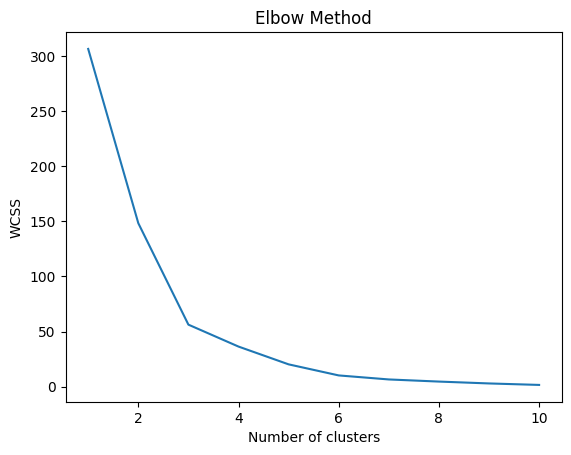

In [20]:
#Elbow Method graph Plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

In [21]:
# From above graph 
optimal_num_clusters=7

In [22]:
# Applying K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Segment'] = kmeans.fit_predict(X_pca)

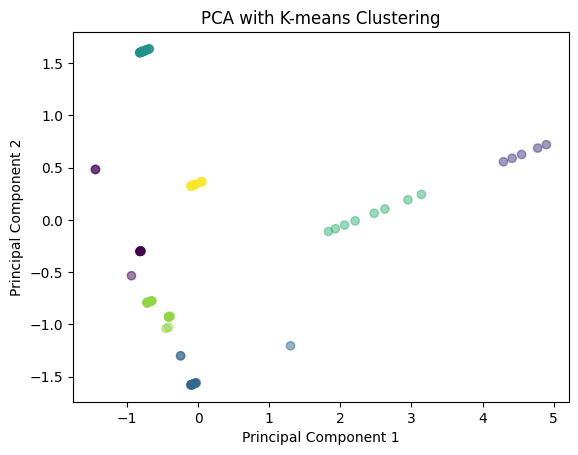

In [23]:
# Visualizing the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Segment'], cmap='viridis', marker='o', alpha=0.5)
plt.title('PCA with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

`Segment Profiling`

In [24]:
# Changing datatype of Battery capacity column
df['Battery capacity (kWh)'] = pd.to_numeric(df['Battery capacity (kWh)'], errors='coerce')

In [25]:
df.isna().sum()

Vehicle type              0
Model                     0
Battery technology        0
Charging type             0
Battery capacity (kWh)    0
Segment                   0
dtype: int64

In [26]:
# Selecting numeric columns from dataset
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculating mean of each features within each clusters
segment_profile = df.groupby('Segment')[numeric_columns].mean()
print(segment_profile)

         Vehicle type  Battery technology  Charging type  \
Segment                                                    
0              0.0000            1.818182       3.090909   
1              2.0000            0.000000       5.000000   
2              0.0625            0.000000       4.000000   
3              1.0000            2.000000       0.000000   
4              2.0000            0.000000       5.000000   
5              0.0000            0.304348       2.000000   
6              1.0000            0.000000       0.000000   

         Battery capacity (kWh)  Segment  
Segment                                   
0                      1.131636      0.0  
1                     84.740000      1.0  
2                      2.418250      2.0  
3                      4.983478      3.0  
4                     23.968750      4.0  
5                      2.281130      5.0  
6                      5.495333      6.0  


`Target Segment Selection`

In [27]:
# Based on  highest battery capacity
target_segment = segment_profile['Battery capacity (kWh)'].idxmax()
print("Target Segment:", target_segment)

Target Segment: 1


In [28]:
# Based on vehicle type and battery technology
segment_profile[['Vehicle type', 'Battery technology']]
selected_segment = segment_profile[(segment_profile['Vehicle type'] == 1) & (segment_profile['Battery technology'] == 0)]
print("Selected Segment:\n", selected_segment)

Selected Segment:
          Vehicle type  Battery technology  Charging type  \
Segment                                                    
6                 1.0                 0.0            0.0   

         Battery capacity (kWh)  Segment  
Segment                                   
6                      5.495333      6.0  
